# Perform data cleaning and exploratory data analysis
(EDA) on a dataset of your choice, such as the Titanic
dataset from Kaggle. Explore the relationships between
variables and identify patterns and trends in the data.

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [19]:
# Data loading
train = pd.read_csv('/content/train (1).csv')
test = pd.read_csv('/content/test (1).csv')

In [20]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [21]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# Performing EDA on Training set

In [22]:
# Checking column names
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [23]:
# checking data types of training set
train.dtypes

,0
PassengerId,int64
Survived,int64
Pclass,int64
Name,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64


In [24]:
# Checking null values
train.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [25]:
# checking data shape
train.shape

(891, 12)

In [26]:
# Checking duplicated records
train.duplicated().sum()

np.int64(0)

# Observations
1. In training dataset we observe 891 rows and 12 columns.
2. The 'Cabin' column has 687 null values.
3. The 'Age' column has 177 null values.


In [27]:
# dropping null value columns in the dataset
train.drop('Cabin', axis=1, inplace=True)
train.drop('Age',axis=1,inplace=True)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500,S


In [29]:
# Removing null value records
train.dropna(inplace=True)

In [31]:
# checking statistical summary
train.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,889.0,446.000000,256.998173,1.0,224.0000,446.0000,668.0,891.0000
Survived,889.0,0.382452,0.486260,0.0,0.0000,0.0000,1.0,1.0000
Pclass,889.0,2.311586,0.834700,1.0,2.0000,3.0000,3.0,3.0000
SibSp,889.0,0.524184,1.103705,0.0,0.0000,0.0000,1.0,8.0000
Parch,889.0,0.382452,0.806761,0.0,0.0000,0.0000,0.0,6.0000
Fare,889.0,32.096681,49.697504,0.0,7.8958,14.4542,31.0,512.3292


In [32]:
# Checking correlation of the dataset
num_df = train.select_dtypes(include=np.number)
cat_df = train.select_dtypes(exclude = np.number)

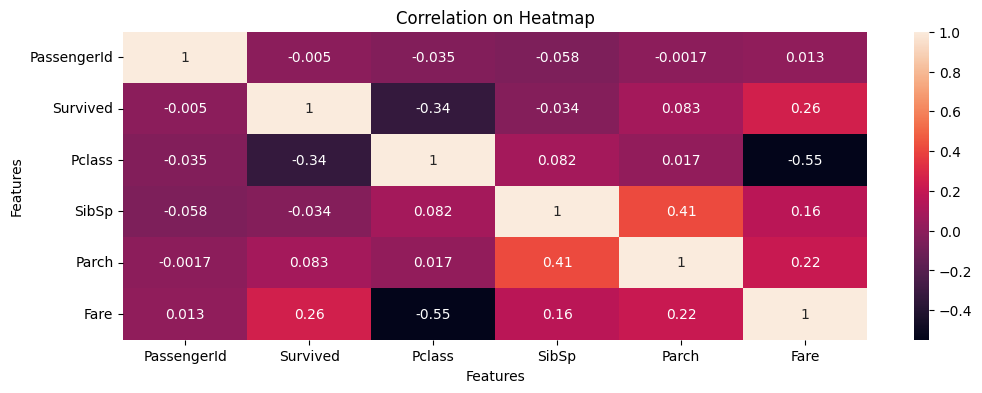

In [35]:
# Visualizing the correlation on heatmap
plt.figure(figsize=(12,4))
sns.heatmap(num_df.corr(),annot=True)
plt.title('Correlation on Heatmap')
plt.xlabel('Features')
plt.ylabel('Features')
plt.show()

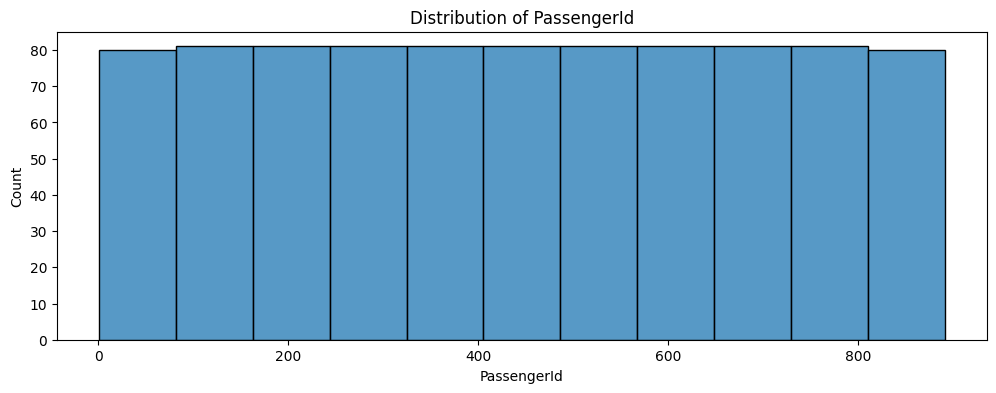

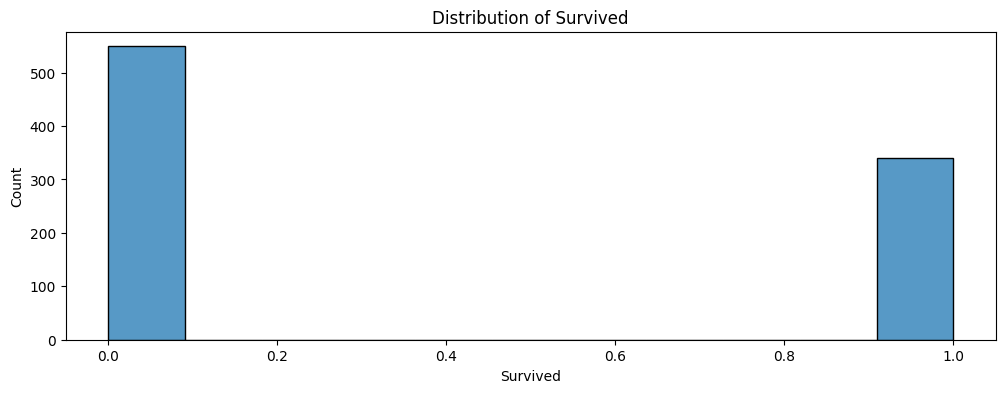

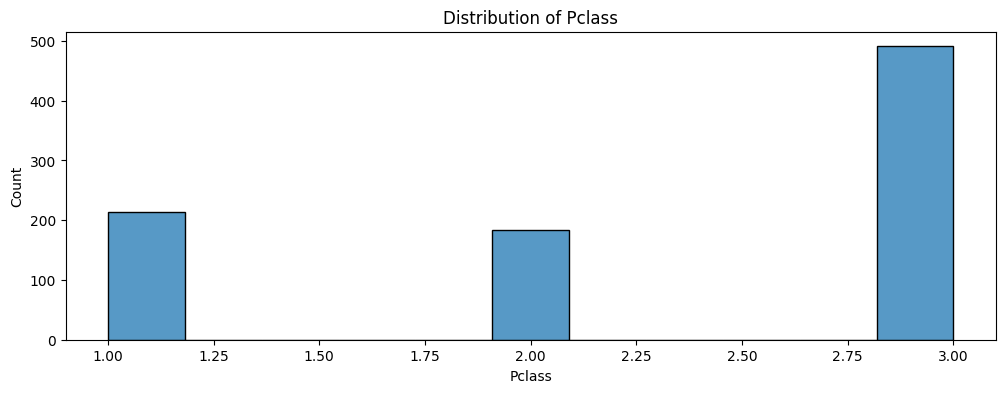

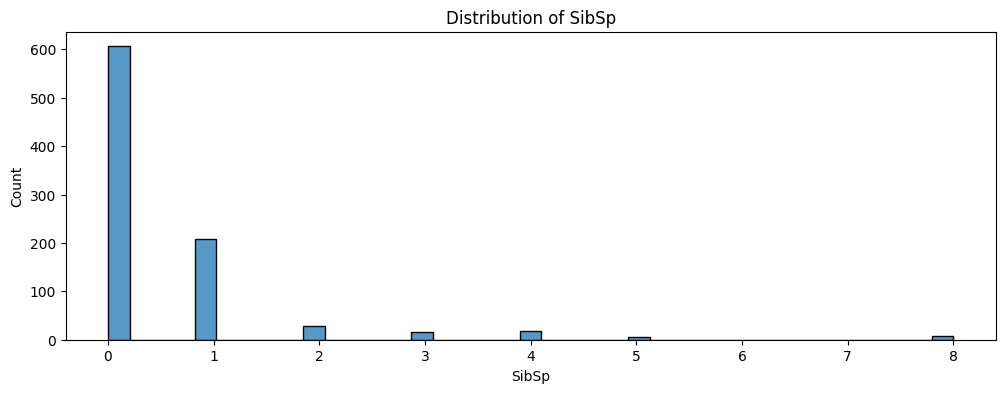

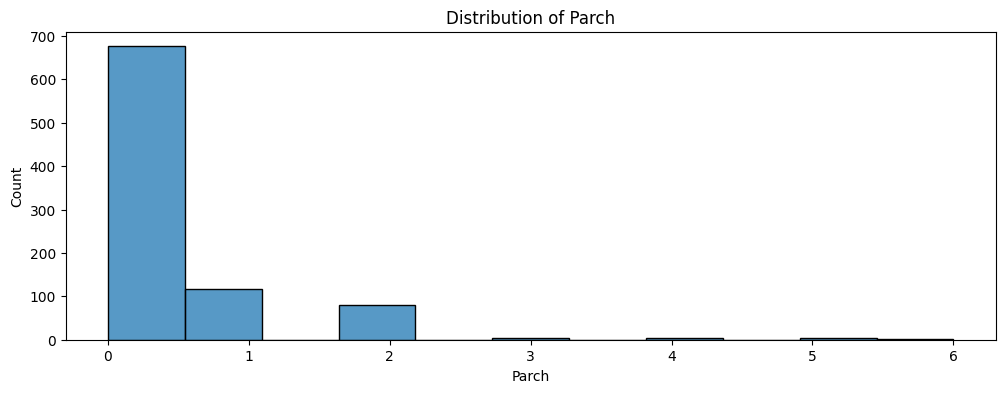

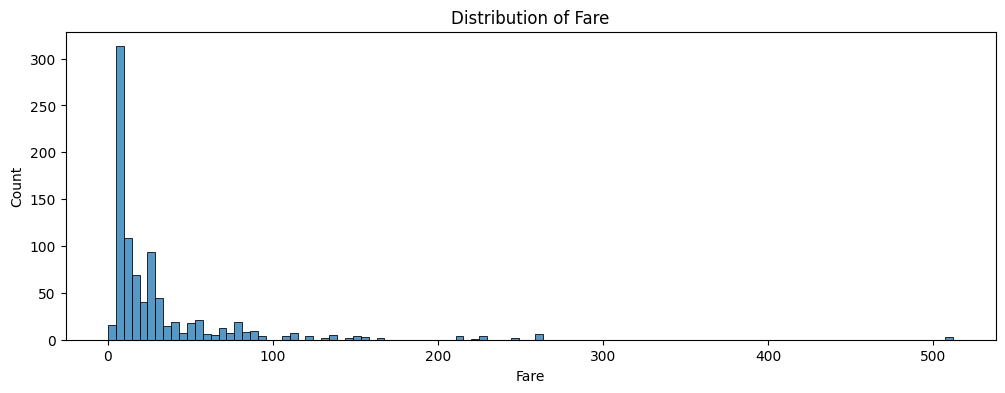

In [38]:
# checking distribution of the dataset
for col in num_df.columns:
  plt.figure(figsize=(12,4))
  sns.histplot(num_df[col])
  plt.title(f'Distribution of {col}')
  plt.show()

In [39]:
# checking unique records in the categorical column
for col in cat_df.columns:
  print(f'{col} has {cat_df[col].nunique()} unique records')


Name has 889 unique records
Sex has 2 unique records
Ticket has 680 unique records
Embarked has 3 unique records


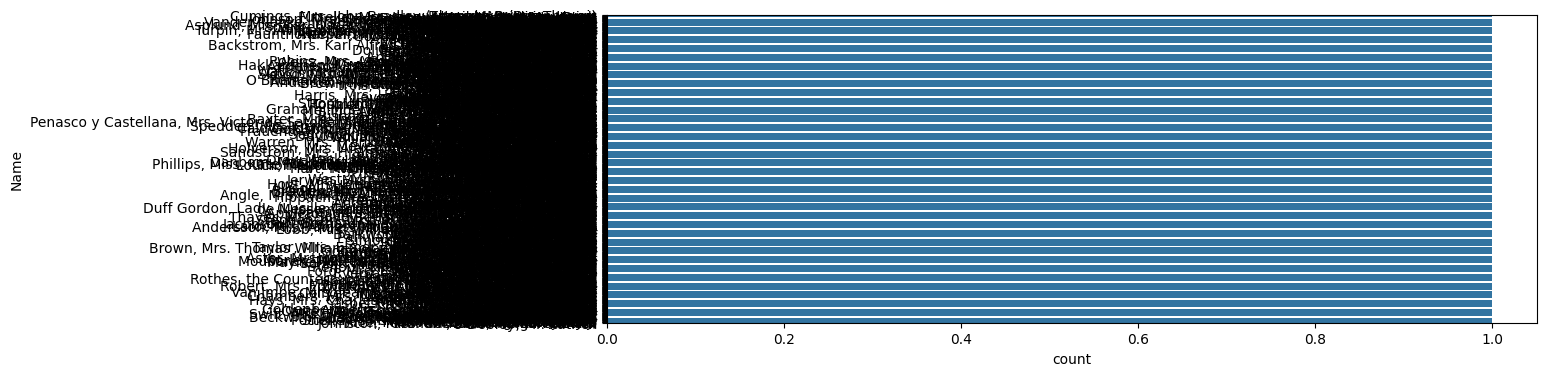

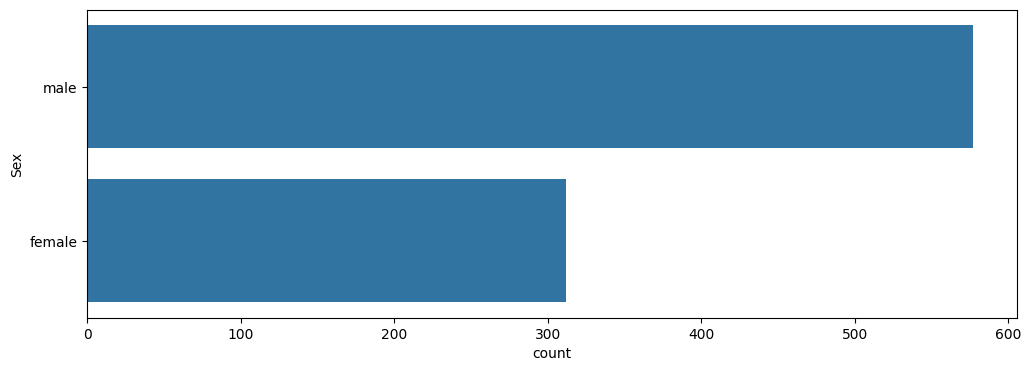

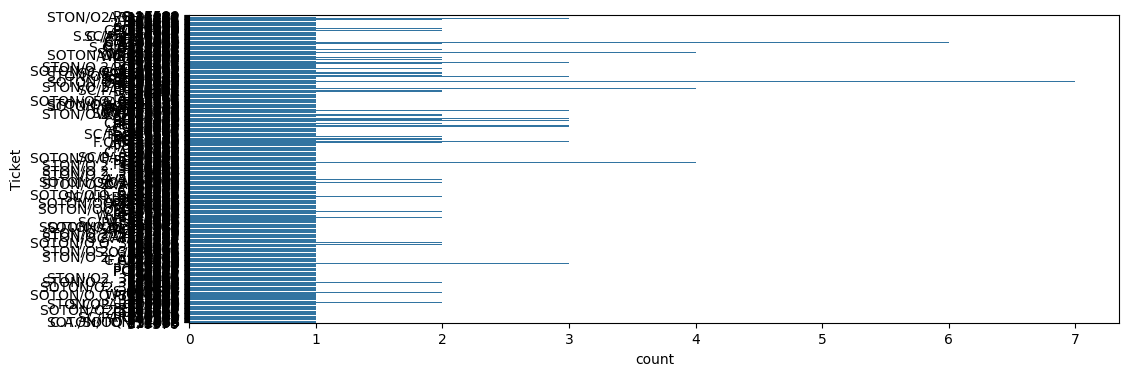

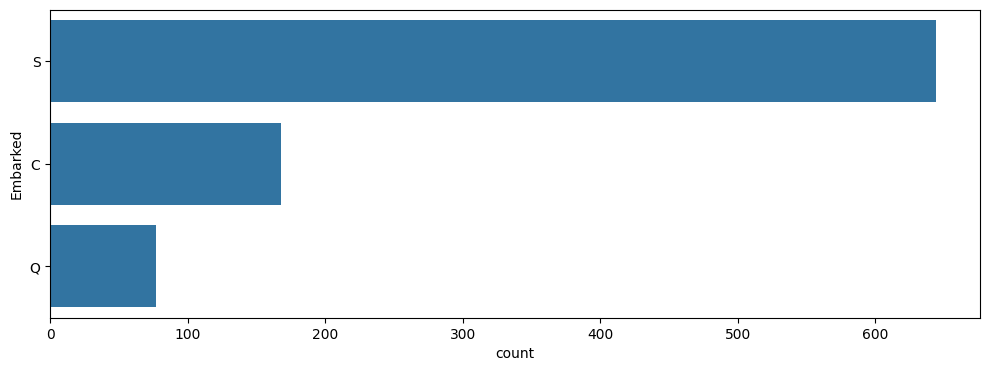

In [40]:
# Displaying frequency of the categorica variables
for col in cat_df.columns:
  plt.figure(figsize=(12,4))
  sns.countplot(cat_df[col])
  plt.show()

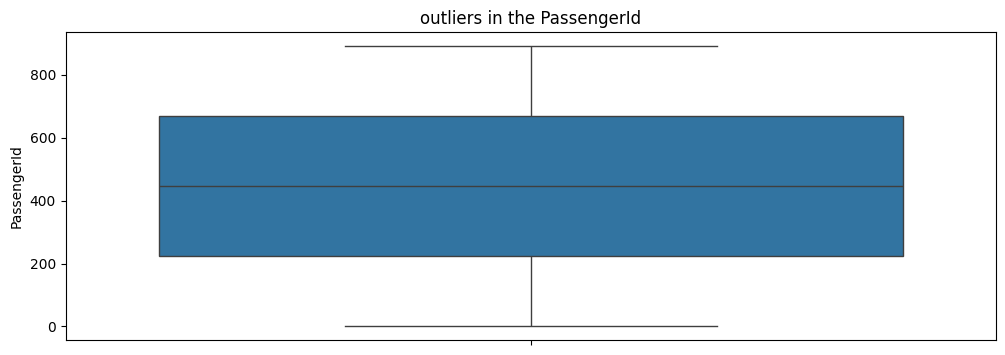

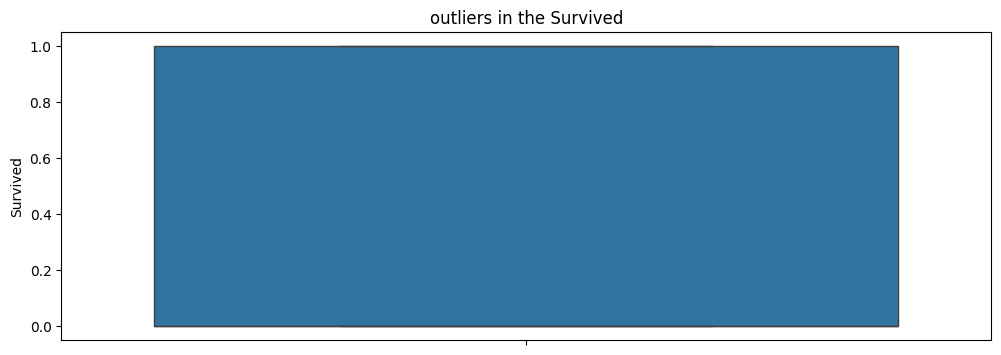

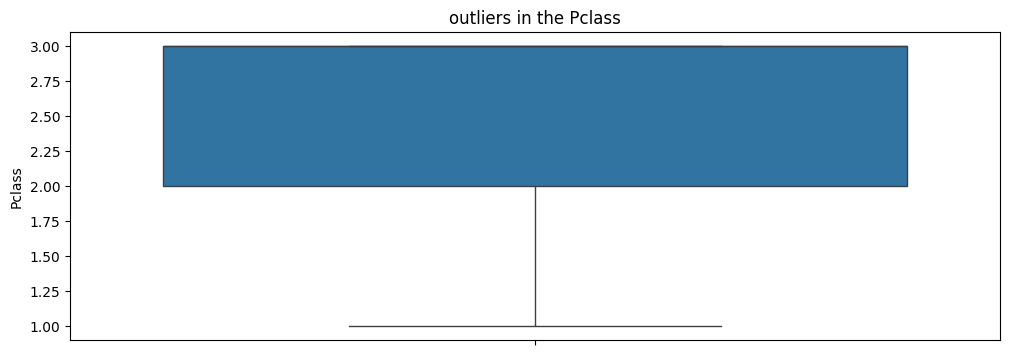

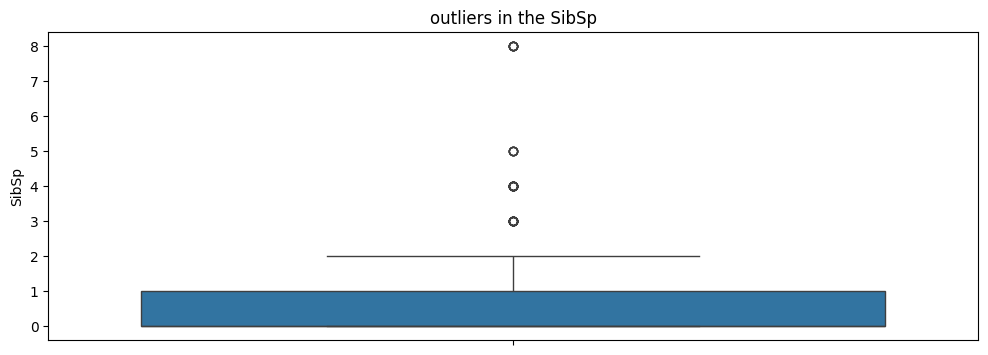

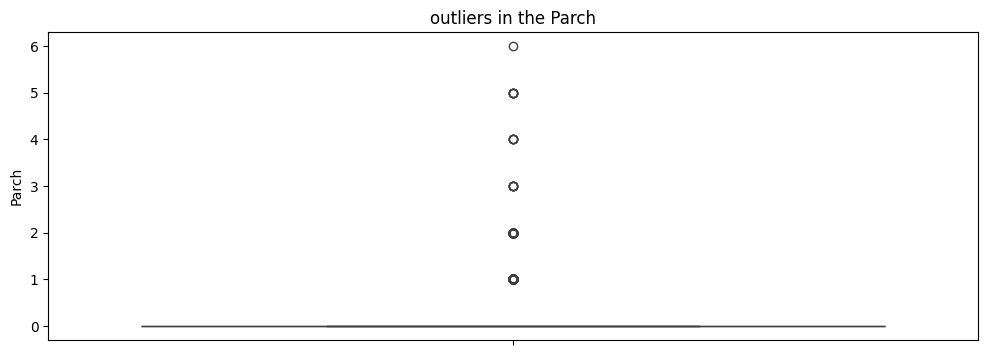

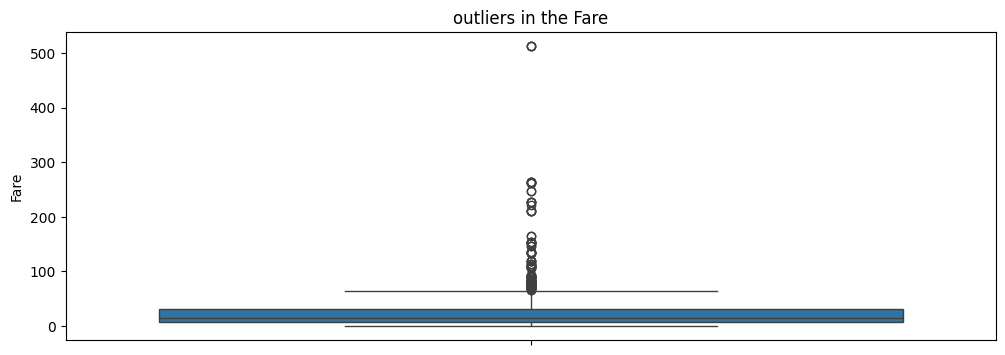

In [43]:
# Checking outliers in the dataset
for col in num_df.columns:
  plt.figure(figsize=(12,4))
  sns.boxplot(num_df[col])
  plt.title(f'outliers in the {col}')
  plt.show()